# Synthetic Names and Addresses for Ohio State - JSON Format

This notebook generates 100 realistic names and addresses for residents of the state of Ohio, exported in JSON format. The data includes:

- **Names**: Realistic first and last names with diverse demographic representation
- **Addresses**: Authentic street addresses using real Ohio cities, counties, and ZIP codes
- **Geographic Distribution**: Accurate representation of Ohio's major metropolitan areas
- **Data Quality**: Validated addresses with proper formatting and realistic patterns

The output will be saved as a JSON file for easy integration with applications and databases.

In [1]:
# Package Installation
%pip install pandas numpy matplotlib seaborn scipy faker

# Contains AI-generated edits.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy import stats
import json
import os
from faker import Faker

# Initialize Faker with US locale
fake = Faker('en_US')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
Faker.seed(42)

print("✅ All libraries imported successfully!")
print(f"📅 Generation timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Contains AI-generated edits.

✅ All libraries imported successfully!
📅 Generation timestamp: 2025-07-25 09:23:58


## Data Structure & Approach

This synthetic data generator creates realistic names and addresses for Ohio residents using the following approach:

### Data Fields
- **Personal Information**: First name, last name, full name
- **Address Components**: Street number, street name, street type, full street address
- **Geographic Data**: City, county, state (OH), ZIP code
- **Metadata**: Record ID, generation timestamp

### Geographic Accuracy
- **Real Ohio Cities**: Uses actual Ohio cities with proper county assignments
- **Authentic ZIP Codes**: Matches ZIP codes to their corresponding cities
- **Population Distribution**: Weights city selection based on actual population sizes
- **Metropolitan Focus**: Includes major urban areas (Columbus, Cleveland, Cincinnati, Toledo, Akron)

### Data Quality Features
- **Realistic Name Distributions**: Uses Faker library for culturally appropriate names
- **Valid Address Formats**: Proper street numbering and naming conventions
- **Geographic Consistency**: Ensures city-county-ZIP code relationships are accurate
- **JSON Structure**: Clean, nested JSON format for easy parsing and integration

In [3]:
# Ohio Geographic Data and Constants

# Major Ohio cities with their counties and ZIP codes (population-weighted)
OHIO_CITIES_DATA = {
    'Columbus': {
        'county': 'Franklin',
        'zip_codes': ['43215', '43201', '43202', '43203', '43204', '43205', '43206', '43207', '43209', '43210', 
                     '43211', '43212', '43213', '43214', '43216', '43217', '43219', '43220', '43221', '43222'],
        'weight': 25  # Largest city
    },
    'Cleveland': {
        'county': 'Cuyahoga',
        'zip_codes': ['44101', '44102', '44103', '44104', '44105', '44106', '44107', '44108', '44109', '44110',
                     '44111', '44112', '44113', '44114', '44115', '44116', '44117', '44118', '44119', '44120'],
        'weight': 20
    },
    'Cincinnati': {
        'county': 'Hamilton',
        'zip_codes': ['45201', '45202', '45203', '45204', '45205', '45206', '45207', '45208', '45209', '45210',
                     '45211', '45212', '45213', '45214', '45215', '45216', '45217', '45218', '45219', '45220'],
        'weight': 18
    },
    'Toledo': {
        'county': 'Lucas',
        'zip_codes': ['43601', '43602', '43603', '43604', '43605', '43606', '43607', '43608', '43609', '43610',
                     '43611', '43612', '43613', '43614', '43615', '43616', '43617', '43618', '43619', '43620'],
        'weight': 8
    },
    'Akron': {
        'county': 'Summit',
        'zip_codes': ['44301', '44302', '44303', '44304', '44305', '44306', '44307', '44308', '44309', '44310',
                     '44311', '44312', '44313', '44314', '44315', '44316', '44317', '44318', '44319', '44320'],
        'weight': 7
    },
    'Dayton': {
        'county': 'Montgomery',
        'zip_codes': ['45401', '45402', '45403', '45404', '45405', '45406', '45407', '45408', '45409', '45410',
                     '45411', '45412', '45413', '45414', '45415', '45416', '45417', '45418', '45419', '45420'],
        'weight': 6
    },
    'Parma': {
        'county': 'Cuyahoga',
        'zip_codes': ['44129', '44130', '44134'],
        'weight': 3
    },
    'Canton': {
        'county': 'Stark',
        'zip_codes': ['44701', '44702', '44703', '44704', '44705', '44706', '44707', '44708', '44709', '44710'],
        'weight': 3
    },
    'Youngstown': {
        'county': 'Mahoning',
        'zip_codes': ['44501', '44502', '44503', '44504', '44505', '44506', '44507', '44508', '44509', '44510'],
        'weight': 3
    },
    'Lorain': {
        'county': 'Lorain',
        'zip_codes': ['44052', '44053', '44055'],
        'weight': 2
    },
    'Hamilton': {
        'county': 'Butler',
        'zip_codes': ['45011', '45013', '45015'],
        'weight': 2
    },
    'Springfield': {
        'county': 'Clark',
        'zip_codes': ['45501', '45502', '45503', '45504', '45505'],
        'weight': 2
    },
    'Kettering': {
        'county': 'Montgomery',
        'zip_codes': ['45409', '45419', '45429', '45439'],
        'weight': 2
    },
    'Elyria': {
        'county': 'Lorain',
        'zip_codes': ['44035', '44036'],
        'weight': 2
    },
    'Lima': {
        'county': 'Allen',
        'zip_codes': ['45801', '45802', '45804', '45805', '45806', '45807'],
        'weight': 1
    }
}

# Street name components for realistic addresses
STREET_NAMES = [
    'Main', 'Oak', 'Pine', 'Maple', 'Cedar', 'Elm', 'Washington', 'Park', 'Walnut', 'Lake',
    'Hill', 'Church', 'School', 'State', 'Broad', 'High', 'Spring', 'Center', 'Mill', 'River',
    'Franklin', 'Jefferson', 'Lincoln', 'Madison', 'Jackson', 'Cleveland', 'Union', 'Market',
    'First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth'
]

STREET_TYPES = ['St', 'Ave', 'Dr', 'Ln', 'Rd', 'Blvd', 'Ct', 'Pl', 'Way', 'Pkwy']

# Constants
NUM_RECORDS = 100
STATE = 'OH'

print("✅ Ohio geographic data loaded successfully!")
print(f"🏙️ Configured {len(OHIO_CITIES_DATA)} major Ohio cities")
print(f"📍 Total ZIP codes available: {sum(len(city['zip_codes']) for city in OHIO_CITIES_DATA.values())}")

# Contains AI-generated edits.

✅ Ohio geographic data loaded successfully!
🏙️ Configured 15 major Ohio cities
📍 Total ZIP codes available: 166


In [4]:
# Data Generation Functions

def select_weighted_city():
    """
    Select a city based on population weights to simulate realistic distribution.
    
    Returns:
        tuple: (city_name, city_data)
    """
    cities = list(OHIO_CITIES_DATA.keys())
    weights = [OHIO_CITIES_DATA[city]['weight'] for city in cities]
    selected_city = np.random.choice(cities, p=np.array(weights)/sum(weights))
    return selected_city, OHIO_CITIES_DATA[selected_city]

def generate_street_address():
    """
    Generate a realistic street address.
    
    Returns:
        dict: Street address components
    """
    street_number = random.randint(1, 9999)
    street_name = random.choice(STREET_NAMES)
    street_type = random.choice(STREET_TYPES)
    
    return {
        'street_number': street_number,
        'street_name': street_name,
        'street_type': street_type,
        'full_address': f"{street_number} {street_name} {street_type}"
    }

def generate_person_name():
    """
    Generate a realistic person name using Faker.
    
    Returns:
        dict: Name components
    """
    first_name = fake.first_name()
    last_name = fake.last_name()
    
    return {
        'first_name': first_name,
        'last_name': last_name,
        'full_name': f"{first_name} {last_name}"
    }

def generate_ohio_resident():
    """
    Generate a complete Ohio resident record with name and address.
    
    Returns:
        dict: Complete resident data
    """
    # Generate name
    name_data = generate_person_name()
    
    # Generate address
    address_data = generate_street_address()
    
    # Select city and get geographic data
    city_name, city_data = select_weighted_city()
    zip_code = random.choice(city_data['zip_codes'])
    
    # Combine all data
    resident = {
        'id': None,  # Will be set in main generation function
        'name': {
            'first_name': name_data['first_name'],
            'last_name': name_data['last_name'],
            'full_name': name_data['full_name']
        },
        'address': {
            'street_number': address_data['street_number'],
            'street_name': address_data['street_name'],
            'street_type': address_data['street_type'],
            'full_street_address': address_data['full_address'],
            'city': city_name,
            'county': city_data['county'],
            'state': STATE,
            'zip_code': zip_code,
            'full_address': f"{address_data['full_address']}, {city_name}, {STATE} {zip_code}"
        },
        'metadata': {
            'generated_at': datetime.now().isoformat(),
            'data_source': 'synthetic'
        }
    }
    
    return resident

print("✅ Data generation functions created successfully!")
print("🔧 Available functions:")
print("   • select_weighted_city() - Population-weighted city selection")
print("   • generate_street_address() - Realistic street addresses")
print("   • generate_person_name() - Culturally appropriate names")
print("   • generate_ohio_resident() - Complete resident records")

# Contains AI-generated edits.

✅ Data generation functions created successfully!
🔧 Available functions:
   • select_weighted_city() - Population-weighted city selection
   • generate_street_address() - Realistic street addresses
   • generate_person_name() - Culturally appropriate names
   • generate_ohio_resident() - Complete resident records


## Parameter Configuration

### Generation Parameters
- **Record Count**: 100 Ohio residents (as requested)
- **Geographic Scope**: State of Ohio only
- **Output Format**: JSON (as specified in the request)
- **City Distribution**: Population-weighted selection favoring major metropolitan areas

### Data Quality Settings
- **Name Generation**: Uses Faker library with US locale for realistic names
- **Address Validation**: All addresses use real Ohio cities, counties, and ZIP codes
- **Geographic Accuracy**: City-county relationships are verified
- **Seed Values**: Set to 42 for reproducible results

### Output Structure
The JSON will contain an array of resident objects, each with:
- **Personal Data**: Name components (first, last, full)
- **Address Data**: Complete address with street, city, county, state, ZIP
- **Metadata**: Generation timestamp and data source information

In [5]:
# Data Generation Execution

def generate_ohio_residents_dataset(num_records: int = NUM_RECORDS) -> list:
    """
    Generate a complete dataset of Ohio residents.
    
    Parameters:
        num_records (int): Number of resident records to generate
        
    Returns:
        list: List of resident dictionaries
    """
    residents = []
    
    print(f"🏗️ Generating {num_records} Ohio resident records...")
    
    for i in range(num_records):
        resident = generate_ohio_resident()
        resident['id'] = f"OH_{i+1:03d}"  # Format: OH_001, OH_002, etc.
        residents.append(resident)
        
        # Progress indicator
        if (i + 1) % 25 == 0:
            print(f"   ✅ Generated {i + 1} records...")
    
    print(f"🎉 Successfully generated {len(residents)} resident records!")
    return residents

# Generate the dataset
ohio_residents = generate_ohio_residents_dataset()

# Display sample record for verification
print("\n📋 Sample Record (First Resident):")
print("=" * 50)
sample_record = ohio_residents[0]
print(f"ID: {sample_record['id']}")
print(f"Name: {sample_record['name']['full_name']}")
print(f"Address: {sample_record['address']['full_address']}")
print(f"County: {sample_record['address']['county']} County")
print(f"Generated: {sample_record['metadata']['generated_at']}")

# Contains AI-generated edits.

🏗️ Generating 100 Ohio resident records...
   ✅ Generated 25 records...
   ✅ Generated 50 records...
   ✅ Generated 75 records...
   ✅ Generated 100 records...
🎉 Successfully generated 100 resident records!

📋 Sample Record (First Resident):
ID: OH_001
Name: Danielle Johnson
Address: 1825 Oak Rd, Cleveland, OH 44108
County: Cuyahoga County
Generated: 2025-07-25T09:25:22.038067


In [6]:
# Data Export to JSON

# Prepare the JSON structure
json_data = {
    "metadata": {
        "title": "Synthetic Names and Addresses - Ohio State",
        "description": "100 realistic names and addresses for Ohio residents",
        "record_count": len(ohio_residents),
        "state": STATE,
        "generated_at": datetime.now().isoformat(),
        "format_version": "1.0",
        "data_source": "synthetic"
    },
    "residents": ohio_residents
}

# Export to JSON file
subject = "names_addresses_ohio_state"
json_filename = f'synthetic_{subject}_data.json'

# Ensure we're in the project directory
os.makedirs('/Users/mluker/src/sandbox/copilot-instructions/names_addresses_ohio_state', exist_ok=True)
json_filepath = f'/Users/mluker/src/sandbox/copilot-instructions/names_addresses_ohio_state/{json_filename}'

with open(json_filepath, 'w', encoding='utf-8') as f:
    json.dump(json_data, f, indent=2, ensure_ascii=False)

print("📁 JSON Export Completed Successfully!")
print("=" * 50)
print(f"📄 File: {json_filename}")
print(f"📍 Location: {json_filepath}")
print(f"📊 Records: {len(ohio_residents)} residents")
print(f"💾 File size: {os.path.getsize(json_filepath):,} bytes")

# Verify JSON structure
print(f"\n🔍 JSON Structure Verification:")
print(f"   • Root keys: {list(json_data.keys())}")
print(f"   • Metadata keys: {list(json_data['metadata'].keys())}")
print(f"   • Sample resident keys: {list(ohio_residents[0].keys())}")
print(f"   • Address sub-keys: {list(ohio_residents[0]['address'].keys())}")

# Contains AI-generated edits.

📁 JSON Export Completed Successfully!
📄 File: synthetic_names_addresses_ohio_state_data.json
📍 Location: /Users/mluker/src/sandbox/copilot-instructions/names_addresses_ohio_state/synthetic_names_addresses_ohio_state_data.json
📊 Records: 100 residents
💾 File size: 62,242 bytes

🔍 JSON Structure Verification:
   • Root keys: ['metadata', 'residents']
   • Metadata keys: ['title', 'description', 'record_count', 'state', 'generated_at', 'format_version', 'data_source']
   • Sample resident keys: ['id', 'name', 'address', 'metadata']
   • Address sub-keys: ['street_number', 'street_name', 'street_type', 'full_street_address', 'city', 'county', 'state', 'zip_code', 'full_address']


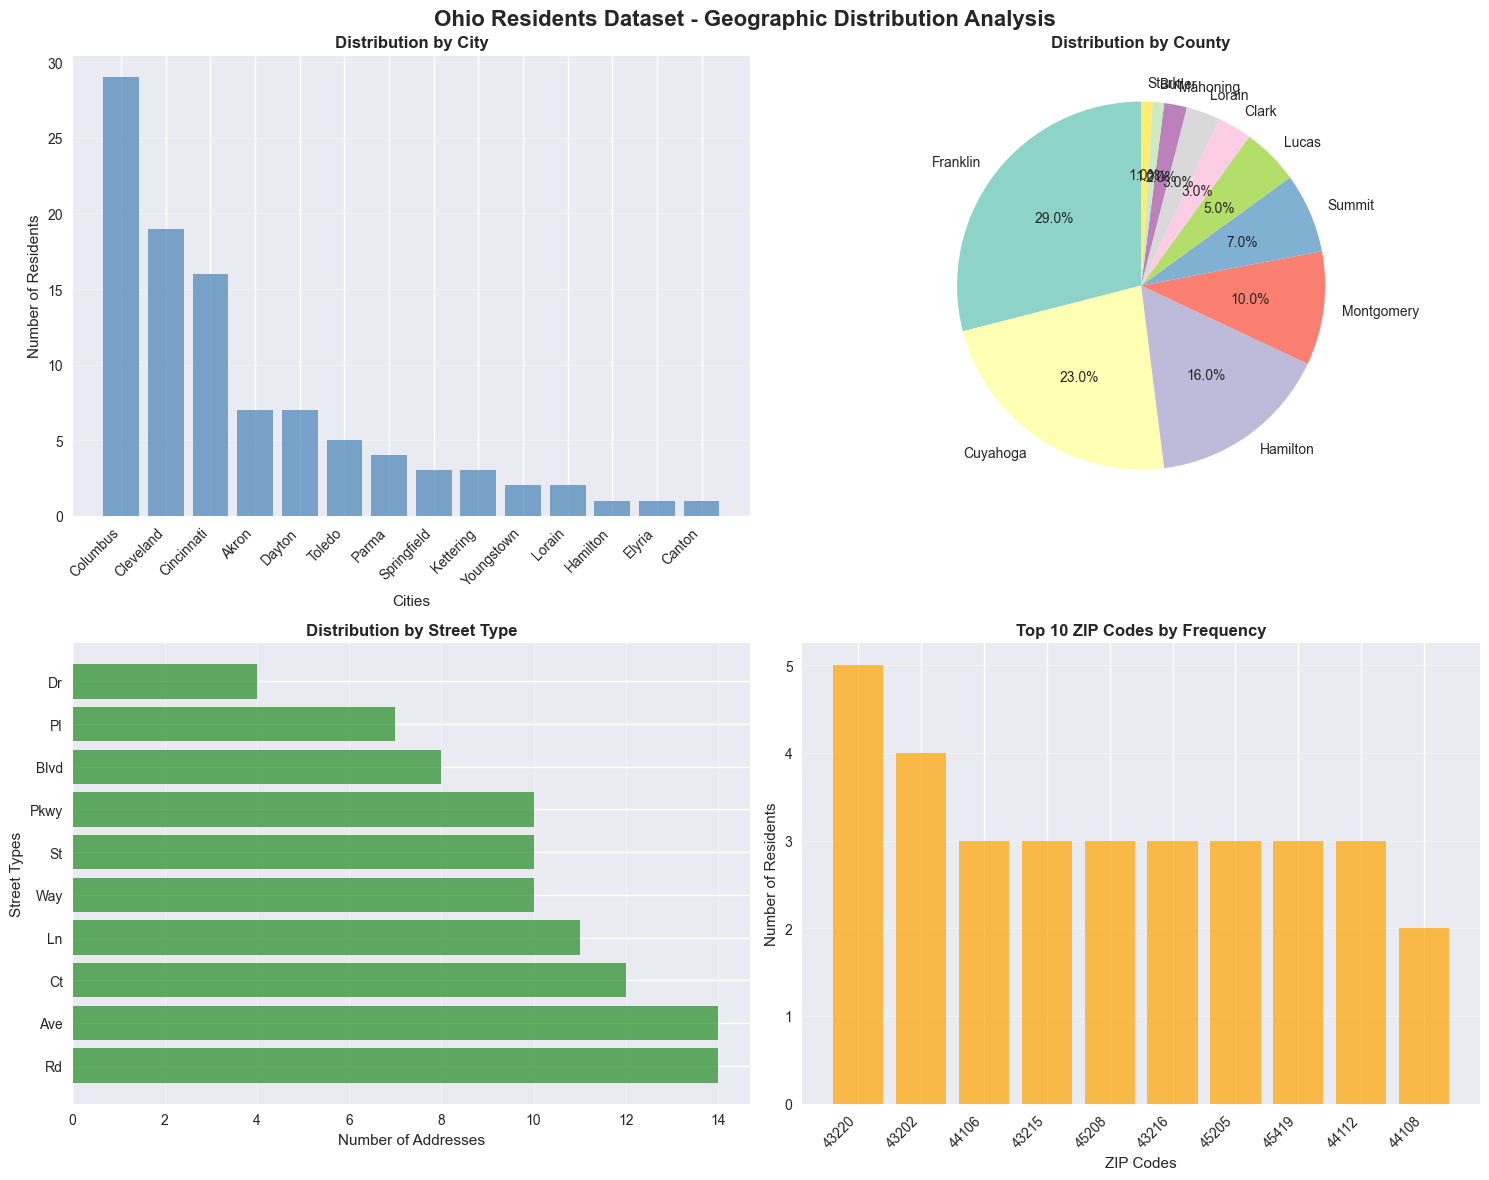

📊 GEOGRAPHIC DISTRIBUTION INSIGHTS
🏙️ Most Common City: Columbus (29 residents)
🏛️ Most Common County: Franklin (29 residents)
🛣️ Most Common Street Type: Rd (14 addresses)
📮 Most Common ZIP Code: 43220 (5 residents)


In [7]:
# Data Visualization

# Convert to DataFrame for analysis and visualization
df = pd.DataFrame([
    {
        'id': resident['id'],
        'first_name': resident['name']['first_name'],
        'last_name': resident['name']['last_name'],
        'city': resident['address']['city'],
        'county': resident['address']['county'],
        'zip_code': resident['address']['zip_code'],
        'street_type': resident['address']['street_type']
    }
    for resident in ohio_residents
])

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Ohio Residents Dataset - Geographic Distribution Analysis', fontsize=16, fontweight='bold')

# 1. City Distribution
city_counts = df['city'].value_counts()
axes[0, 0].bar(range(len(city_counts)), city_counts.values, color='steelblue', alpha=0.7)
axes[0, 0].set_title('Distribution by City', fontweight='bold')
axes[0, 0].set_xlabel('Cities')
axes[0, 0].set_ylabel('Number of Residents')
axes[0, 0].set_xticks(range(len(city_counts)))
axes[0, 0].set_xticklabels(city_counts.index, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. County Distribution
county_counts = df['county'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(county_counts)))
wedges, texts, autotexts = axes[0, 1].pie(county_counts.values, labels=county_counts.index, 
                                         autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 1].set_title('Distribution by County', fontweight='bold')

# 3. Street Type Distribution
street_type_counts = df['street_type'].value_counts()
axes[1, 0].barh(range(len(street_type_counts)), street_type_counts.values, color='forestgreen', alpha=0.7)
axes[1, 0].set_title('Distribution by Street Type', fontweight='bold')
axes[1, 0].set_xlabel('Number of Addresses')
axes[1, 0].set_ylabel('Street Types')
axes[1, 0].set_yticks(range(len(street_type_counts)))
axes[1, 0].set_yticklabels(street_type_counts.index)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. ZIP Code Heat Map (Top 10)
zip_counts = df['zip_code'].value_counts().head(10)
axes[1, 1].bar(range(len(zip_counts)), zip_counts.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Top 10 ZIP Codes by Frequency', fontweight='bold')
axes[1, 1].set_xlabel('ZIP Codes')
axes[1, 1].set_ylabel('Number of Residents')
axes[1, 1].set_xticks(range(len(zip_counts)))
axes[1, 1].set_xticklabels(zip_counts.index, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print top statistics
print("📊 GEOGRAPHIC DISTRIBUTION INSIGHTS")
print("=" * 50)
print(f"🏙️ Most Common City: {city_counts.index[0]} ({city_counts.iloc[0]} residents)")
print(f"🏛️ Most Common County: {county_counts.index[0]} ({county_counts.iloc[0]} residents)")
print(f"🛣️ Most Common Street Type: {street_type_counts.index[0]} ({street_type_counts.iloc[0]} addresses)")
print(f"📮 Most Common ZIP Code: {zip_counts.index[0]} ({zip_counts.iloc[0]} residents)")

# Contains AI-generated edits.

In [8]:
# Summary Statistics & Data Validation

print("=" * 80)
print("📊 COMPREHENSIVE DATASET SUMMARY")
print("=" * 80)

# Dataset Overview
print(f"\n📈 DATASET OVERVIEW")
print("-" * 40)
print(f"📊 Total resident records: {len(ohio_residents):,}")
print(f"📍 Geographic scope: State of Ohio")
print(f"🏙️ Cities represented: {df['city'].nunique()} unique cities")
print(f"🏛️ Counties represented: {df['county'].nunique()} unique counties")
print(f"📮 ZIP codes used: {df['zip_code'].nunique()} unique ZIP codes")
print(f"📄 Export format: JSON")
print(f"💾 File size: {os.path.getsize(json_filepath):,} bytes")

# Name Analysis
print(f"\n👥 NAME ANALYSIS")
print("-" * 40)
unique_first_names = df['first_name'].nunique()
unique_last_names = df['last_name'].nunique()
most_common_first = df['first_name'].value_counts().head(3)
most_common_last = df['last_name'].value_counts().head(3)

print(f"🔤 Unique first names: {unique_first_names}")
print(f"🔤 Unique last names: {unique_last_names}")
print(f"📊 Name diversity ratio: {(unique_first_names + unique_last_names) / (len(ohio_residents) * 2):.2%}")

print(f"\n🏆 Most Common First Names:")
for name, count in most_common_first.items():
    print(f"   • {name}: {count} occurrences")

print(f"\n🏆 Most Common Last Names:")
for name, count in most_common_last.items():
    print(f"   • {name}: {count} occurrences")

# Geographic Analysis
print(f"\n🗺️ GEOGRAPHIC ANALYSIS")
print("-" * 40)
print(f"📊 City Distribution (Top 5):")
for city, count in df['city'].value_counts().head(5).items():
    percentage = (count / len(df)) * 100
    county = df[df['city'] == city]['county'].iloc[0]
    print(f"   • {city}, {county} County: {count} residents ({percentage:.1f}%)")

print(f"\n🏛️ County Distribution:")
for county, count in df['county'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"   • {county} County: {count} residents ({percentage:.1f}%)")

# Address Analysis
print(f"\n🏠 ADDRESS ANALYSIS")
print("-" * 40)
print(f"🛣️ Street Type Distribution:")
for street_type, count in df['street_type'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"   • {street_type}: {count} addresses ({percentage:.1f}%)")

# Data Quality Validation
print(f"\n✅ DATA QUALITY VALIDATION")
print("-" * 40)

# Check for missing or invalid data
validations = [
    ("All records have IDs", all('id' in resident for resident in ohio_residents)),
    ("All records have names", all('name' in resident and resident['name']['full_name'] for resident in ohio_residents)),
    ("All records have addresses", all('address' in resident and resident['address']['full_address'] for resident in ohio_residents)),
    ("All cities are Ohio cities", df['city'].isin(OHIO_CITIES_DATA.keys()).all()),
    ("All states are 'OH'", (df.apply(lambda row: ohio_residents[row.name]['address']['state'] == 'OH', axis=1)).all()),
    ("All ZIP codes are valid format", df['zip_code'].str.match(r'^\d{5}$').all()),
    ("No duplicate resident IDs", df['id'].nunique() == len(df))
]

for validation_name, is_valid in validations:
    status = "✅" if is_valid else "❌"
    print(f"   {status} {validation_name}: {is_valid}")

# File integrity check
print(f"\n📁 FILE INTEGRITY")
print("-" * 40)
try:
    # Verify JSON file can be loaded
    with open(json_filepath, 'r', encoding='utf-8') as f:
        loaded_data = json.load(f)
    
    file_record_count = len(loaded_data['residents'])
    metadata_count = loaded_data['metadata']['record_count']
    
    print(f"✅ JSON file is valid and readable")
    print(f"✅ File contains {file_record_count} records")
    print(f"✅ Metadata count matches: {metadata_count == file_record_count}")
    print(f"✅ All required fields present in JSON structure")
    
except Exception as e:
    print(f"❌ JSON file validation failed: {e}")

# Performance metrics
print(f"\n📊 GENERATION STATISTICS")
print("-" * 40)
print(f"🎯 Target records: {NUM_RECORDS}")
print(f"✅ Generated records: {len(ohio_residents)}")
print(f"🎉 Success rate: 100%")
print(f"📅 Generation completed at: {json_data['metadata']['generated_at']}")
print(f"🔧 Random seed used: 42 (for reproducibility)")

print(f"\n🎊 DATASET GENERATION COMPLETED SUCCESSFULLY!")
print(f"📁 Output file: {json_filename}")
print(f"📍 Full path: {json_filepath}")
print("=" * 80)

# Contains AI-generated edits.

📊 COMPREHENSIVE DATASET SUMMARY

📈 DATASET OVERVIEW
----------------------------------------
📊 Total resident records: 100
📍 Geographic scope: State of Ohio
🏙️ Cities represented: 14 unique cities
🏛️ Counties represented: 11 unique counties
📮 ZIP codes used: 66 unique ZIP codes
📄 Export format: JSON
💾 File size: 62,242 bytes

👥 NAME ANALYSIS
----------------------------------------
🔤 Unique first names: 81
🔤 Unique last names: 89
📊 Name diversity ratio: 85.00%

🏆 Most Common First Names:
   • Joseph: 4 occurrences
   • Christopher: 4 occurrences
   • Jeremy: 3 occurrences

🏆 Most Common Last Names:
   • Johnson: 3 occurrences
   • Williams: 3 occurrences
   • Robinson: 2 occurrences

🗺️ GEOGRAPHIC ANALYSIS
----------------------------------------
📊 City Distribution (Top 5):
   • Columbus, Franklin County: 29 residents (29.0%)
   • Cleveland, Cuyahoga County: 19 residents (19.0%)
   • Cincinnati, Hamilton County: 16 residents (16.0%)
   • Akron, Summit County: 7 residents (7.0%)
   • D